# Data Import and Preparation

In [1]:
import hashlib
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from datascience import *
from datascience import ls
from datascience.ldv import *
from datascience.ls import *
pd.set_option("display.precision",2)

In [2]:
hashlib.md5("pcg180000".encode('utf-8')).hexdigest()

'b9b5c1509bb1b6df4d2132be40a76729'

In [3]:
con = sqlite3.connect('wooldridge2.db')
data = pd.read_sql('select * from meap93',con)
pd.read_sql('select * from meap93_labels',con)

,index,variable name,type,format,variable label
0,0,lnchprg,float,%9.0g,perc of studs in sch lnch prog
1,1,enroll,int,%9.0g,school enrollment
2,2,staff,float,%9.0g,staff per 1000 students
3,3,expend,int,%9.0g,"expend. per stud, $"
4,4,salary,float,%9.0g,"avg. teacher salary, $"
5,5,benefits,int,%9.0g,"avg. teacher benefits, $"
6,6,droprate,float,%9.0g,"school dropout rate, perc"
7,7,gradrate,float,%9.0g,"school graduation rate, perc"
8,8,math10,float,%9.0g,perc studs passing MEAP math
9,9,sci11,float,%9.0g,perc studs passing MEAP science


In [4]:
data.shape

(408, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 12 columns):
index       408 non-null int64
lnchprg     408 non-null float64
enroll      408 non-null int64
staff       408 non-null float64
expend      408 non-null int64
salary      408 non-null int64
benefits    408 non-null int64
droprate    408 non-null float64
gradrate    408 non-null float64
math10      408 non-null float64
sci11       408 non-null float64
totcomp     408 non-null int64
dtypes: float64(6), int64(6)
memory usage: 38.3 KB


meap93 is a cross-sectional dataset of 408 high schools in the state of Michigan for 1993 and has below 12 variables
index:    school index
lnchprg:  percent of students in school lunch program
enroll:   school enrollment
staff:    staff per 1000 students
expend:   expenditure per student, dollars
salary:   average teacher salary, dollars
benefits: average teacher benefits, dollars
droprate: school dropout rate, percent
gradrate: school graduation rate, percent
math10:   percent of students passing MEAP math
sci11:    percent of students passing MEAP science
totcomp:  total compensation for teacher (salary+benefits)

In [6]:
data.describe()

,index,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp
count,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,203.50,25.20,2663.81,100.64,4376.58,31774.51,6463.43,5.07,83.65,24.11,49.18,38237.94
std,117.92,13.61,2696.82,13.30,775.79,5038.30,1456.34,5.49,13.37,10.49,12.52,5985.09
min,0.00,1.40,212.00,65.90,3332.00,19764.00,0.00,0.00,23.50,1.90,7.20,24498.00
25%,101.75,14.62,1037.50,91.45,3821.25,28185.50,5536.50,1.90,77.00,16.62,41.30,34032.00
50%,203.50,23.85,1840.50,99.00,4145.00,31266.00,6304.50,3.70,86.30,23.40,49.10,37443.50
75%,305.25,33.82,3084.75,108.03,4658.75,34499.75,7228.00,6.50,93.23,30.05,57.15,41637.00
max,407.00,79.50,16793.00,166.60,7419.00,52812.00,11618.00,61.90,127.10,66.70,85.70,63518.00


In [7]:
df = data.iloc[:,1:] ## removing the index column
df[df['gradrate'] > 100] ## 7 schools have gradrate more than 100

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp
54,9.8,4077,83.4,3930,36440,7152,1.4,101.3,26.8,54.4,43592
58,10.3,3299,68.9,3332,36045,6484,0.1,101.5,36.6,71.1,42529
75,11.9,1882,106.5,4521,30604,5950,1.5,102.8,23.7,36.8,36554
214,24.7,672,131.9,5680,31681,6287,1.4,127.1,8.3,33.8,37968
327,36.3,2480,108.5,4414,28631,5458,3.3,110.3,8.5,28.5,34089
329,37.3,398,104.3,3559,25023,5248,2.9,101.8,38.5,45.0,30271
365,43.6,2139,89.7,4220,31949,9151,0.7,115.7,16.3,39.5,41100


# Exploratory Data Analysis

In [8]:
df.describe()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp
count,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00,408.00
mean,25.20,2663.81,100.64,4376.58,31774.51,6463.43,5.07,83.65,24.11,49.18,38237.94
std,13.61,2696.82,13.30,775.79,5038.30,1456.34,5.49,13.37,10.49,12.52,5985.09
min,1.40,212.00,65.90,3332.00,19764.00,0.00,0.00,23.50,1.90,7.20,24498.00
25%,14.62,1037.50,91.45,3821.25,28185.50,5536.50,1.90,77.00,16.62,41.30,34032.00
50%,23.85,1840.50,99.00,4145.00,31266.00,6304.50,3.70,86.30,23.40,49.10,37443.50
75%,33.82,3084.75,108.03,4658.75,34499.75,7228.00,6.50,93.23,30.05,57.15,41637.00
max,79.50,16793.00,166.60,7419.00,52812.00,11618.00,61.90,127.10,66.70,85.70,63518.00


In [9]:
## correlation matrix
df.corr().style.background_gradient(cmap='coolwarm')

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp
lnchprg,1,-0.16,0.15,-0.19,-0.39,-0.12,0.24,-0.32,-0.41,-0.42,-0.36
enroll,-0.16,1,-0.017,0.38,0.48,0.28,-0.00083,-0.033,0.072,0.062,0.47
staff,0.15,-0.017,1,0.53,-0.26,-0.17,0.042,-0.013,-0.0058,-0.058,-0.26
expend,-0.19,0.38,0.53,1,0.65,0.47,0.0023,0.032,0.18,0.062,0.66
salary,-0.39,0.48,-0.26,0.65,1,0.57,-0.073,0.085,0.24,0.14,0.98
benefits,-0.12,0.28,-0.17,0.47,0.57,1,-0.023,0.019,0.085,0.075,0.72
droprate,0.24,-0.00083,0.042,0.0023,-0.073,-0.023,1,-0.72,-0.18,-0.016,-0.067
gradrate,-0.32,-0.033,-0.013,0.032,0.085,0.019,-0.72,1,0.25,0.1,0.076
math10,-0.41,0.072,-0.0058,0.18,0.24,0.085,-0.18,0.25,1,0.23,0.22
sci11,-0.42,0.062,-0.058,0.062,0.14,0.075,-0.016,0.1,0.23,1,0.14


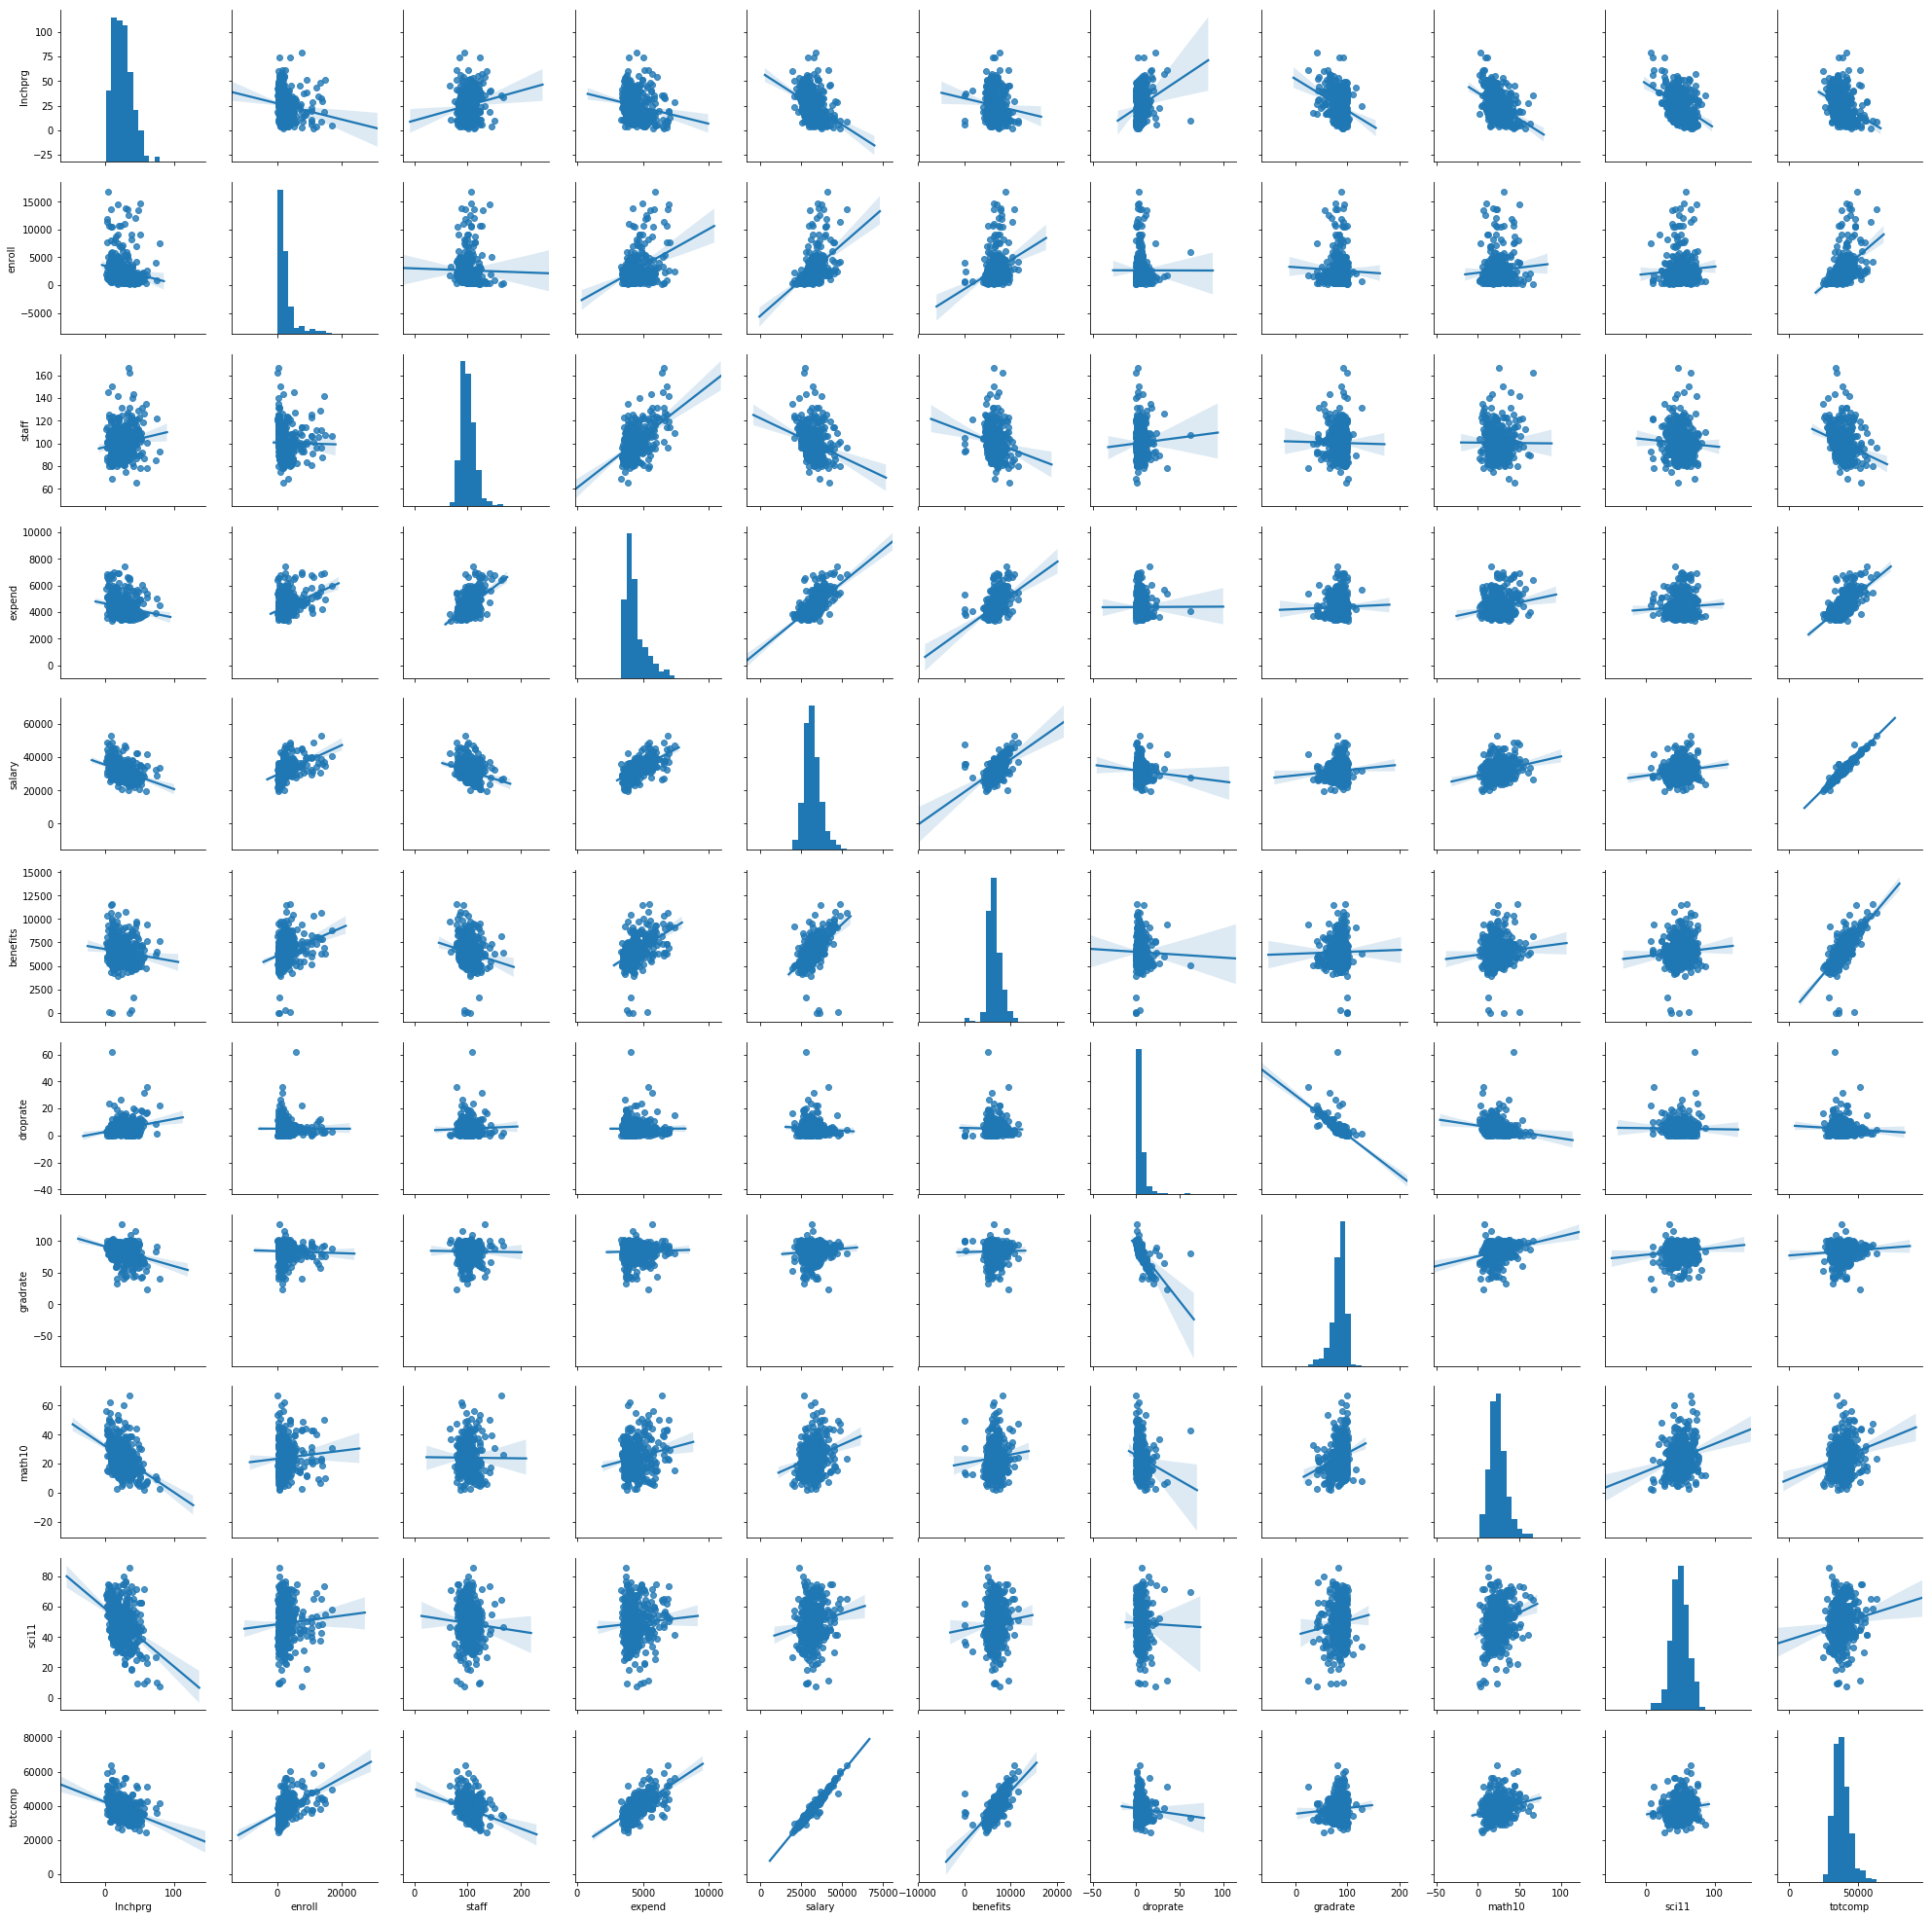

In [10]:
## pairplots
sns.pairplot(df,kind='reg')

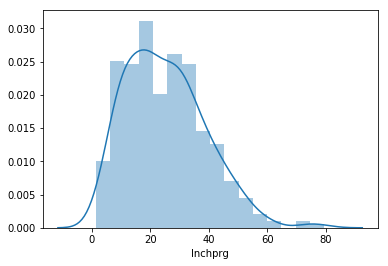

In [11]:
sns.distplot(df['lnchprg'])

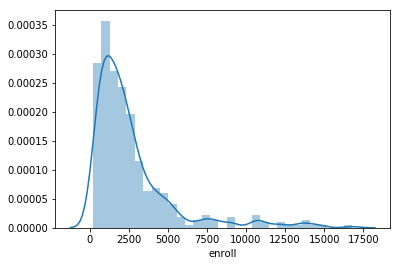

In [12]:
sns.distplot(df['enroll'])

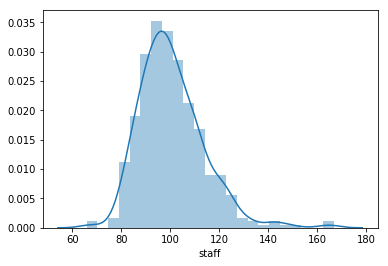

In [13]:
sns.distplot(df['staff'])

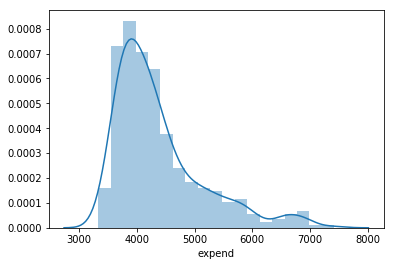

In [14]:
sns.distplot(df['expend'])

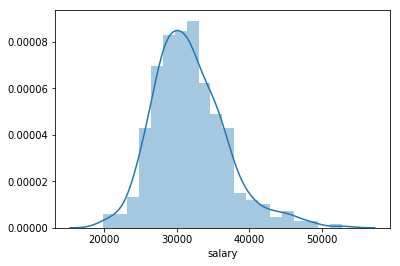

In [15]:
sns.distplot(df['salary'])

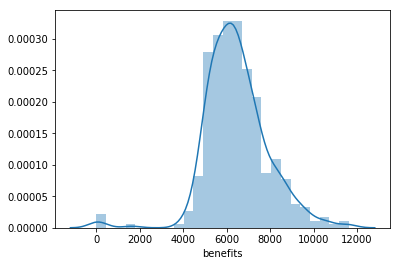

In [16]:
sns.distplot(df['benefits'])

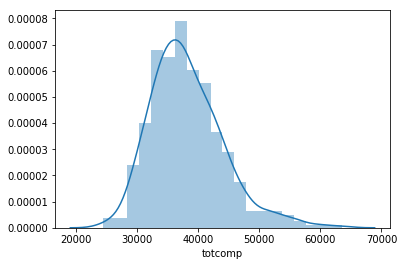

In [17]:
sns.distplot(df['totcomp'])

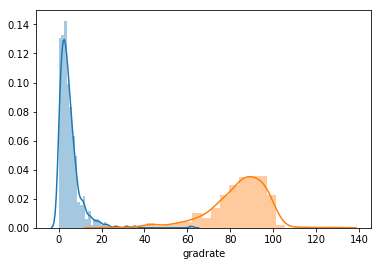

In [18]:
sns.distplot(df['droprate'])
sns.distplot(df['gradrate'])

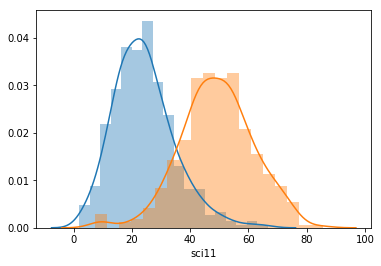

In [19]:
sns.distplot(df['math10'])
sns.distplot(df['sci11'])

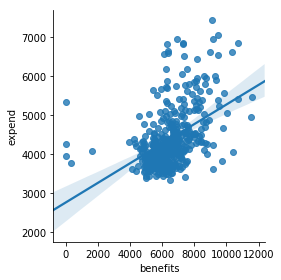

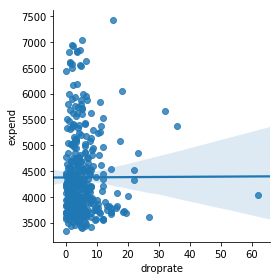

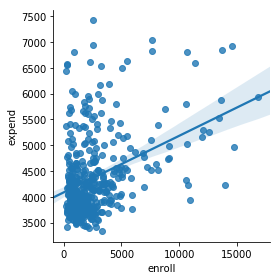

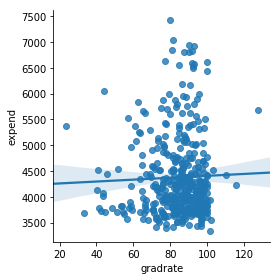

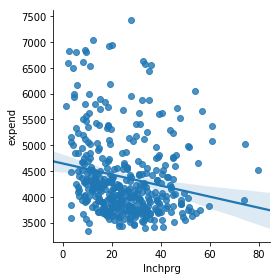

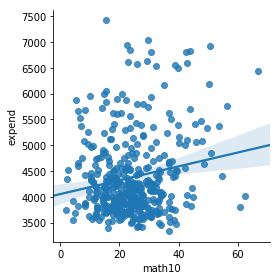

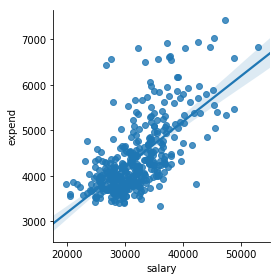

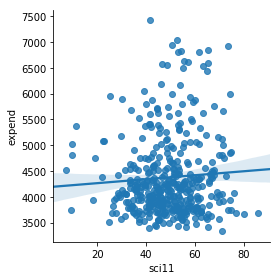

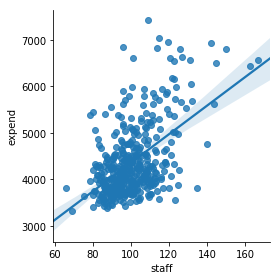

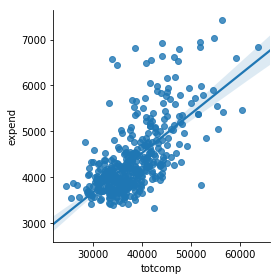

In [20]:
## relationship between expend and other variables
for i in df.columns.difference(['expend']): sns.lmplot(x=i,y='expend',data=df,height=4)

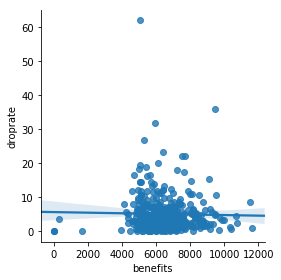

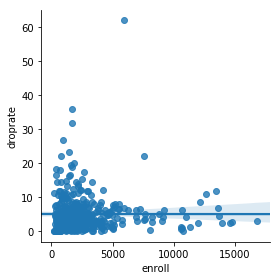

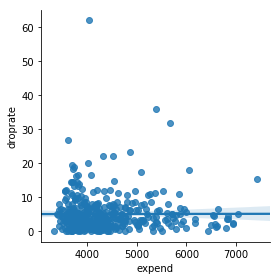

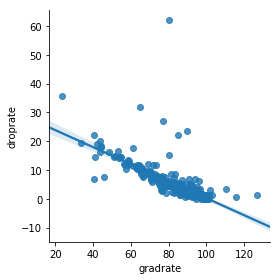

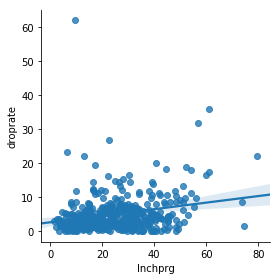

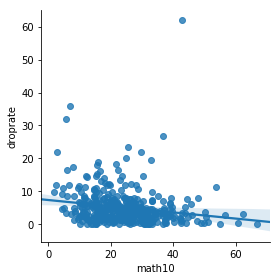

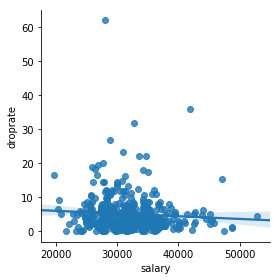

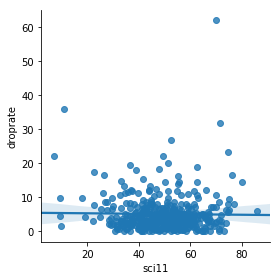

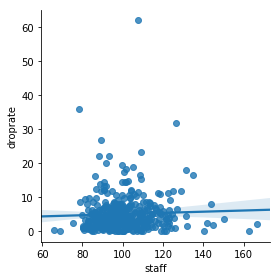

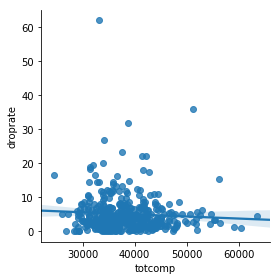

In [21]:
## relationship between droprate and other variables
for i in df.columns.difference(['droprate']): sns.lmplot(x=i,y='droprate',data=df,height=4)

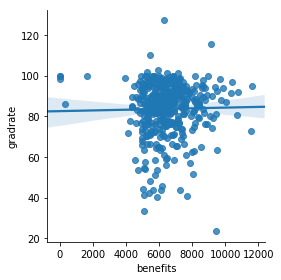

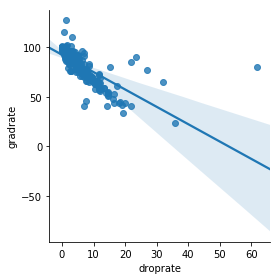

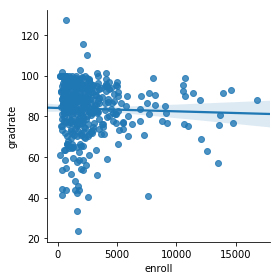

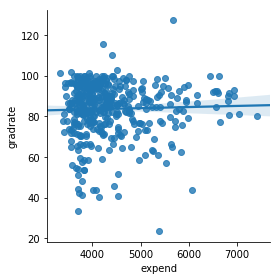

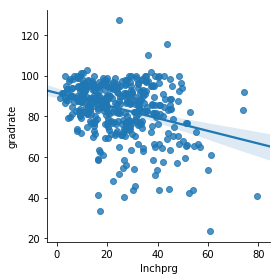

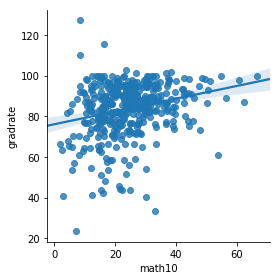

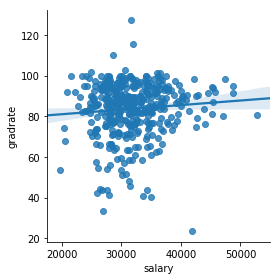

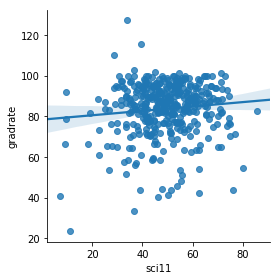

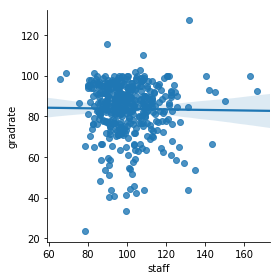

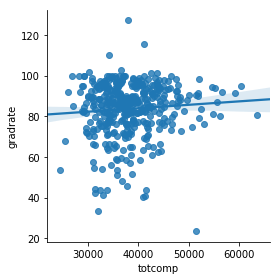

In [22]:
## relationship between gradrate and other variables
for i in df.columns.difference(['gradrate']): sns.lmplot(x=i,y='gradrate',data=df,height=4)

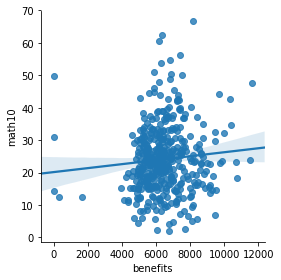

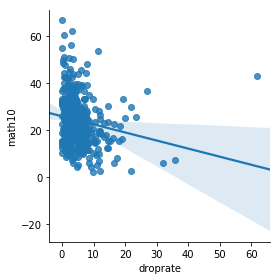

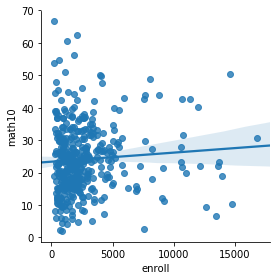

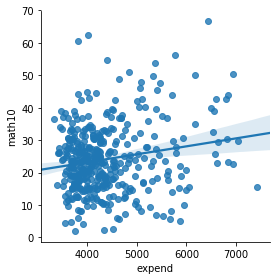

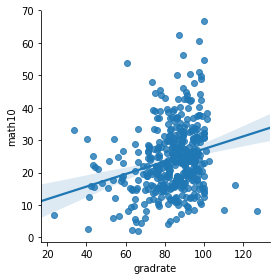

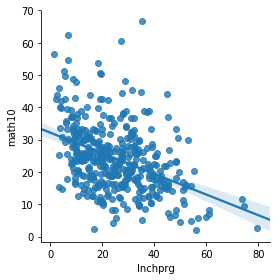

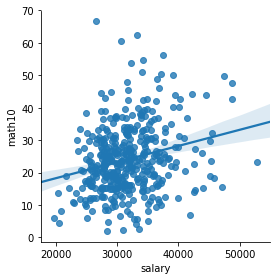

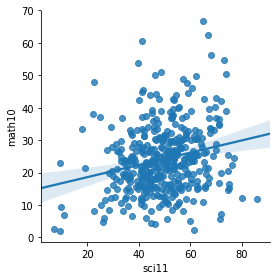

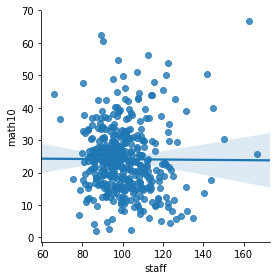

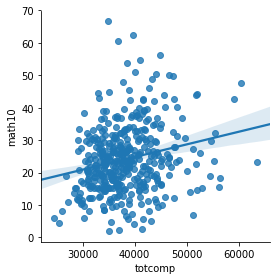

In [23]:
## relationship between math10 and other variables
for i in df.columns.difference(['math10']): sns.lmplot(x=i,y='math10',data=df,height=4)

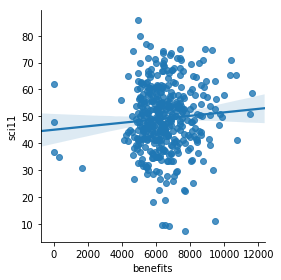

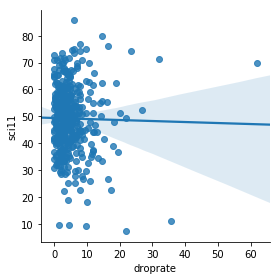

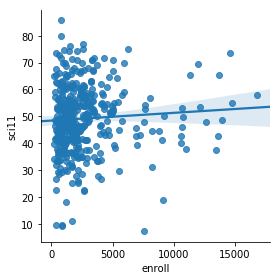

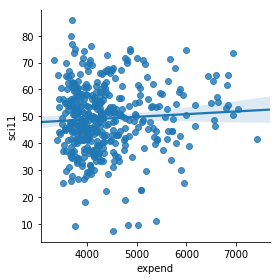

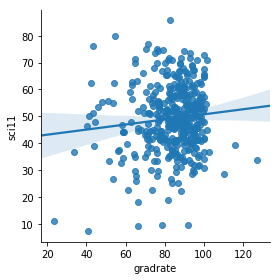

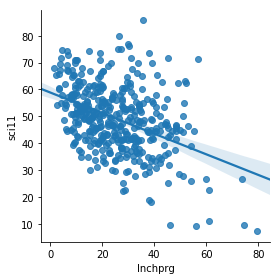

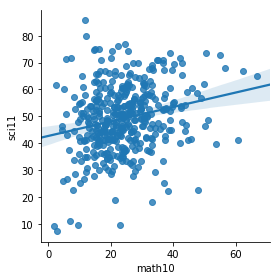

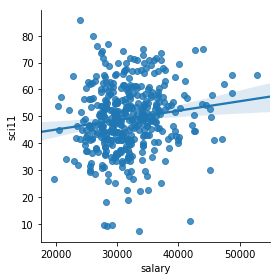

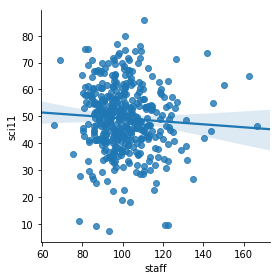

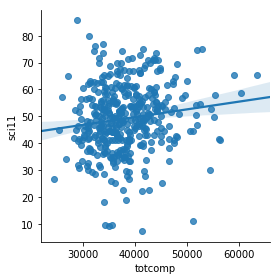

In [24]:
## relationship between sci11 and other variables
for i in df.columns.difference(['sci11']): sns.lmplot(x=i,y='sci11',data=df,height=4)

# Multiple Linear Regression

In [25]:
model1 = smf.ols('expend~lnchprg+enroll+staff+salary+benefits',data=df).fit(cov_type='HC3')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 expend   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1012.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          3.42e-225
Time:                        07:23:33   Log-Likelihood:                -2636.7
No. Observations:                 408   AIC:                             5285.
Df Residuals:                     402   BIC:                             5310.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4341.5873    143.898    -30.171      0.000   -4623.622   -4059.552
lnchprg        1.0415      0.799      1.303      0.192      -0.525       2.608
enroll        -0.0045      0.004     -1.175      0.240      -0.012       0.003
staff         43.6366      0.859     50.821      0.000      41.954      45.320
salary         0.1168      0.003     33.672      0.000       0.110       0.124
benefits       0.0930      0.009     10.763      0.000       0.076       0.110
==============================================================================
Omnibus:                       43.267   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.712
Skew:                           0.497   Prob(JB):                     2.75e-26
Kurtosis:                       5.436   Cond. No.                     4.21e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
ols(df[['lnchprg','enroll','staff','salary','benefits']],df['expend']).tidy()

,est,std.err,t.stat,p.val
(intercept),-4.34e+03,9.81e+01,-44.25,1.35e-156
lnchprg,1.04e+00,6.21e-01,1.68,9.45e-02
enroll,-4.49e-03,3.27e-03,-1.37,1.71e-01
staff,4.36e+01,6.04e-01,72.26,2.02e-232
salary,1.17e-01,2.23e-03,52.34,1.39e-181
benefits,9.30e-02,6.47e-03,14.38,4.02e-38


In [27]:
white(df[['lnchprg','enroll','staff','salary','benefits']],df['expend']).tidy()

,est,std.err,t.stat,p.val
(intercept),-4.34e+03,1.39e+02,-31.31,7.34e-110
lnchprg,1.04e+00,7.69e-01,1.35,1.76e-01
enroll,-4.49e-03,3.67e-03,-1.22,2.22e-01
staff,4.36e+01,8.29e-01,52.66,1.67e-182
salary,1.17e-01,3.27e-03,35.73,7.89e-127
benefits,9.30e-02,7.96e-03,11.69,2.22e-27


In [28]:
model2 = smf.ols('math10~lnchprg+totcomp+gradrate',data=df).fit(cov_type='HC3')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 math10   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     38.59
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           6.02e-22
Time:                        07:23:39   Log-Likelihood:                -1493.9
No. Observations:                 408   AIC:                             2996.
Df Residuals:                     404   BIC:                             3012.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0678      5.594      2.872      0.004       5.103      27.033
lnchprg       -0.2618      0.039     -6.758      0.000      -0.338      -0.186
totcomp        0.0002   8.39e-05      1.861      0.063    -8.3e-06       0.000
gradrate       0.1036      0.041      2.540      0.011       0.024       0.183
==============================================================================
Omnibus:                       55.237   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.194
Skew:                           0.832   Prob(JB):                     2.60e-20
Kurtosis:                       4.592   Cond. No.                     4.22e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 4.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ols(df[['lnchprg','totcomp','gradrate']],df['math10']).tidy()

,est,std.err,t.stat,p.val
(intercept),1.61e+01,5.09e+00,3.16,1.71e-03
lnchprg,-2.62e-01,3.87e-02,-6.76,4.75e-11
totcomp,1.56e-04,8.37e-05,1.87,6.28e-02
gradrate,1.04e-01,3.68e-02,2.81,5.18e-03


In [30]:
white(df[['lnchprg','totcomp','gradrate']],df['math10']).tidy()

,est,std.err,t.stat,p.val
(intercept),1.61e+01,5.47e+00,2.94,3.51e-03
lnchprg,-2.62e-01,3.81e-02,-6.87,2.41e-11
totcomp,1.56e-04,8.22e-05,1.90,5.80e-02
gradrate,1.04e-01,4.00e-02,2.59,9.93e-03


In [31]:
model3 = smf.ols('sci11~lnchprg+totcomp+droprate',data=df).fit(cov_type='HC3')
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sci11   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     25.79
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           2.76e-15
Time:                        07:23:46   Log-Likelihood:                -1569.1
No. Observations:                 408   AIC:                             3146.
Df Residuals:                     404   BIC:                             3162.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.7955      5.072     11.790      0.000      49.855      69.736
lnchprg       -0.4078      0.053     -7.680      0.000      -0.512      -0.304
totcomp    -3.539e-05      0.000     -0.326      0.744      -0.000       0.000
droprate       0.2009      0.136      1.474      0.141      -0.066       0.468
==============================================================================
Omnibus:                        5.620   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.460
Skew:                           0.241   Prob(JB):                       0.0652
Kurtosis:                       3.299   Cond. No.                     3.05e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
ols(df[['lnchprg','totcomp','droprate']],df['sci11']).tidy()

,est,std.err,t.stat,p.val
(intercept),5.98e+01,4.41e+00,13.54,1.01e-34
lnchprg,-4.08e-01,4.55e-02,-8.97,1.11e-17
totcomp,-3.54e-05,1.01e-04,-0.35,7.25e-01
droprate,2.01e-01,1.05e-01,1.91,5.73e-02


In [33]:
white(df[['lnchprg','totcomp','droprate']],df['sci11']).tidy()

,est,std.err,t.stat,p.val
(intercept),5.98e+01,4.85e+00,12.32,7.65e-30
lnchprg,-4.08e-01,5.14e-02,-7.94,2.04e-14
totcomp,-3.54e-05,1.05e-04,-0.34,7.35e-01
droprate,2.01e-01,1.28e-01,1.57,1.16e-01


# OLS vs Ridge vs Lasso

In [34]:
x = df[['lnchprg','enroll','staff','salary','benefits']]
y = df['expend'].values.reshape(-1,1)

### OLS Regression

In [35]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error',cv=8)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

-25634.286916702677


### Ridge Regression

In [36]:
ridge = Ridge()
parameters = {'alpha':[1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=8)
ridge_regressor.fit(x,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-25632.931130426878


### LASSO Regression

In [37]:
lasso = Lasso()
parameters = {'alpha':[1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=8)
lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 20}
-25602.391490312242


### LASSO model better than Ridge model better than OLS model (-25602 > -25632 > -25634)

# Trees Model

In [38]:
def treeproc(x,y,label=''):
    splits = {}
    RSSes = {}
    for name in x.columns:
        x1 = x[name]
        RSS = []
        for item in np.unique(x1)[:-1]:
            y1,y2 = (y[x1<=item],y[x1>item])
            v1,v2 = (y1.var()*len(y1),y2.var()*len(y2))
            v2 = 0 if np.isnan(v2) else v2
            RSS += [v1+v2]
        if not RSS: continue
        i = np.argmin(RSS)
        splits[name] = np.unique(x1)[i]
        RSSes[name] = RSS[i]
    if not RSSes: return
    name = min(RSSes)
    split = splits[name]
    RSS = RSSes[name]
    #if len(label)>2: return
    x1 = x[name]
    z1 = (x1>split).astype(int)
    pvalue = ols(z1,y).tidy()['p.val'][1]
    if pvalue>0.05: return
    print(label,name,split,RSS,pvalue)
    lowerx = x.loc[x1<=split]
    upperx = x.loc[x1>split]
    lowery = y.loc[x1<=split]
    uppery = y.loc[x1>split]
    if len(np.unique(x1[x1<=split]))<=1:
        lowerx = lowerx.drop(name,1)
    if len(np.unique(x1[x1>split]))<=1:
        upperx = upperx.drop(name,1)
    if not lowerx.empty:
        treeproc(lowerx,lowery,label+'L')
    if not upperx.empty:
        treeproc(upperx,uppery,label+'R')

In [39]:
x = df[['lnchprg','enroll','staff','salary','benefits']]
y = df['expend']
treeproc(x,y)

 benefits 7244 184685268.9108676 2.227911899789269e-27
L benefits 6243 97521391.57291666 7.608298920592469e-08
LL benefits 5420 36710017.24954792 0.043117305238221056
LLL benefits 4944 8397002.278867105 4.433034896703583e-05
LLR benefits 5430 nan 0.0009597889946606219


# K-Means

In [40]:
x = df[['math10','sci11']]
n,r = x.shape # 408*2 matrix

In [41]:
k = 3
c = np.random.randint(k,size=(n,))
for j in range(100):
    means = np.array([x[c==i].mean() for i in range(k)])
    dist = np.array([((x-means[i,:]).values**2).sum(1) for i in range(k)])
    (exc,c) = (c,dist.argmin(0))
    if (exc==c).all(): break
wss = np.array([dist[c[i],i] for i in range(n)]).sum()
wss

53574.86311000091

In [42]:
means

array([[31.95764706, 39.84117647],
       [15.85828221, 42.66380368],
       [28.339375  , 60.7875    ]])

In [43]:
dist

array([[1384.72619516,  763.54984221,  349.29890104, ...,  588.58760692,
        1412.83643045, 1921.4563128 ],
       [2280.49648613, 1232.87519779,  916.14065791, ...,  270.65489104,
        1127.04010576, 1430.8217622 ],
       [ 837.98633164,  226.59020664,  281.11858164, ..., 1438.71470664,
        2964.85470664, 3528.99770664]])